<a href="https://colab.research.google.com/github/Sheila-Otieno/Data-Science/blob/master/Thesis__recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import read_excel
import numpy as np
import re
import nltk
import string

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cvtext_cleanVS.xlsx to cvtext_cleanVS.xlsx


In [ ]:
cv_text = pd.read_excel('cvtext_cleanVS.xlsx')
cv_text.head()

,CV,CVText,Category
0,CV1,java java developer developer web developer wo...,Java developer
1,CV2,Java Developer Java Developer Spring Stockholm...,Java developer
2,CV3,Fullstack Developer NET SQL Senior fullstack d...,Developer
3,CV4,service end user end user tools end user commo...,Technical Project Manager
4,CV5,project project manager project management dev...,Project manager


In [ ]:
#fucntion to lower text cases and remove punctuations from text
def lower_text(text):
  text = text.lower()
  return (text)

In [ ]:
cv_text['CV'] = cv_text['CV'].apply(lambda x: lower_text(x))
cv_text['CVText'] = cv_text['CVText'].apply(lambda x: lower_text(x))
cv_text['Category'] = cv_text['Category'].apply(lambda x: lower_text(x))

In [ ]:
cv_text.head()

,CV,CVText,Category
0,cv1,java java developer developer web developer wo...,java developer
1,cv2,java developer java developer spring stockholm...,java developer
2,cv3,fullstack developer net sql senior fullstack d...,developer
3,cv4,service end user end user tools end user commo...,technical project manager
4,cv5,project project manager project management dev...,project manager


In [ ]:
cv_text = cv_text.replace({"[^A-Za-z0-9 ]+": ""}, regex=True)

In [ ]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
import spacy
from spacy.lang.en.examples import sentences

nlp = spacy.load("en_core_web_sm")

In [ ]:
cvtext = cv_text[['CVText','Category']].copy().astype(str)
cvtext.head()

,CVText,Category
0,java java developer developer web developer wo...,java developer
1,java developer java developer spring stockholm...,java developer
2,fullstack developer net sql senior fullstack d...,developer
3,service end user end user tools end user commo...,technical project manager
4,project project manager project management dev...,project manager


In [ ]:
##function to lower text and remove special characters
def lowerspecialclean(text):
  text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
  text = text.lower()
  return text

In [ ]:
normalize_text = np.vectorize(lowerspecialclean)


In [ ]:
cv_text_norm = normalize_text(cv_text['CVText'])
cv_text_norm

array(['java java developer developer web developer worked android developer android java microservices oracle developer mooc vessel monitoring system java backend developerbackend java developer web developer professional mission statement team web skilled java developer project system java developer web developer techniques oracle developeroracle docker jenkins jira android studio database',
       'java developer java developer spring stockholm css spring framework developed html hibernate application experience java developer team designed web sql projects participated development company full kafka software web application oracle thymeleaf designed project restful apis developers full life',
       'fullstack developer net sql senior fullstack developer development scrum git net framework javascript fullstack developer agile methods norwegian bank included systemfullstack development senior fullstack css assignment technology role technologies api doe rest api highly seasoned good

In [ ]:
#kmeans model with 100 iterations and an initial true k
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

#feature engineering with Glove to fit into the kmeans model
cv_glove_vectors = np.array([nlp(str(doc)).vector for doc in cv_text_norm])

#fit the Glove vectors to the kmeans model 
model.fit_transform(cv_glove_vectors)


#Retrive the cluster labels from the model and print them 
cluster_labels = model.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([cvtext, cluster_labels], axis=1)


,CVText,Category,ClusterLabel
0,java java developer developer web developer wo...,java developer,0
1,java developer java developer spring stockholm...,java developer,1
2,fullstack developer net sql senior fullstack d...,developer,0
3,service end user end user tools end user commo...,technical project manager,1
4,project project manager project management dev...,project manager,2
5,scrum master product owner project manager scr...,project manager scrum master,2
6,commerce company project manager commerce comp...,program manager,2
7,project management project manager project veh...,program manager,2
8,project manager mobile access network technica...,program manager,2
9,java spring aws python java javascript spring ...,developer,1


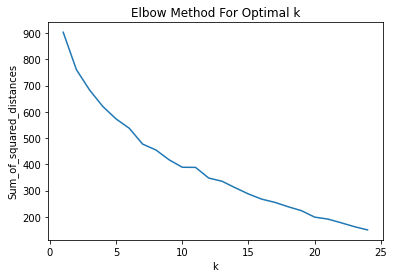

In [ ]:
#check the optimal number of clusters to use
Sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100)
    km = km.fit(cv_glove_vectors)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
doc_glove_vectors = np.array([nlp(str(doc)).vector for doc in cv_text_norm])
km = KMeans(n_clusters=7, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([cv_text, cluster_labels], axis=1)

,CV,CVText,Category,ClusterLabel
0,cv1,java java developer developer web developer wo...,java developer,0
1,cv2,java developer java developer spring stockholm...,java developer,0
2,cv3,fullstack developer net sql senior fullstack d...,developer,0
3,cv4,service end user end user tools end user commo...,technical project manager,1
4,cv5,project project manager project management dev...,project manager,3
5,cv6,scrum master product owner project manager scr...,project manager scrum master,3
6,cv7,commerce company project manager commerce comp...,program manager,2
7,cv8,project management project manager project veh...,program manager,2
8,cv9,project manager mobile access network technica...,program manager,3
9,cv10,java spring aws python java javascript spring ...,developer,4


In [ ]:
#function to predict clusters for new candidates
def job_cluster(text):
  cv_text_norm = normalize_text(text)
  cv_glove_vectors = np.array([nlp(str(doc)).vector for doc in cv_text_norm])
  jobpredict = model.predict(cv_glove_vectors)
  return jobpredict


In [ ]:
text = ['Perfomance managemnet','top management','school head','project manager']
job_cluster(text)

array([0, 0, 2, 2], dtype=int32)

In [ ]:
def candidatereccommendation(text):
  text_prediction = job_cluster(text)
  text_prediction = int(text_prediction)

  #compare if the new candidate clusters match the job categories clusters
  


In [ ]:
doc_glove_vectors = np.array([nlp(str(doc)).vector for doc in cv_text['CVText']])
km = KMeans(n_clusters=3, random_state=0)
km.fit_transform(doc_glove_vectors)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([cv_text, cluster_labels], axis=1)

,CV,CVText,Category,ClusterLabel
0,cv1,java java developer developer web developer wo...,java developer,1
1,cv2,java developer java developer spring stockholm...,java developer,1
2,cv3,fullstack developer net sql senior fullstack d...,developer,1
3,cv4,service end user end user tools end user commo...,technical project manager,0
4,cv5,project project manager project management dev...,project manager,2
5,cv6,scrum master product owner project manager scr...,project manager scrum master,2
6,cv7,commerce company project manager commerce comp...,program manager,0
7,cv8,project management project manager project veh...,program manager,0
8,cv9,project manager mobile access network technica...,program manager,2
9,cv10,java spring aws python java javascript spring ...,developer,1


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving linkedin.csv to linkedin.csv


In [ ]:
linked_data = pd.read_csv('linkedin.csv')
linked_data.head()

,index,category,linkedin,profile_picture,description,Experience,Name,position,location,skills,clean_skills
0,1.0,HR,https://in.linkedin.com/in/sameer-wadhawan-b55...,https://media-exp1.licdn.com/dms/image/C5603AQ...,"An experienced HR professional, HR mentor and...",Senior Vice President & Head of HRCompany Name...,Sameer Wadhawan,Senior Vice President and Head of HR- Samsung ...,"Gurgaon, Haryana, India","['\nPerformance Management\n', '\nHuman Resour...","['Performance Management', 'Human Resources', ..."
1,2.0,HR,https://in.linkedin.com/in/adarsh-krishna-a4ab0a5,https://media-exp1.licdn.com/dms/image/C5103AQ...,"Head Talent Acquisition, HR Leader and Strateg...",Head of Talent Acquisition - India & APAC and ...,Adarsh Krishna,Head Talent Acquisition and HR Leader for Heal...,"Pune, Maharashtra, India","['\nTalent Acquisition\n', '\nEmployee Engagem...","['Talent Acquisition', 'Employee Engagement', ..."
2,3.0,HR,https://in.linkedin.com/in/shrivas-mohit,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",A Talent Acquisition and HR professional with ...,Company NameIBM INDIA Pvt LtdTotal Duration8 y...,Shrivas Mohit,HR@IBM,"Bengaluru, Karnataka, India","['\nHuman Resources\n', '\nRecruiting\n', '\nT...","['Human Resources', 'Recruiting', 'Team Manage..."
3,4.0,HR,https://in.linkedin.com/in/hr-hopes-086734b8,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",NaN,HR/Admin/Personnel/LegalCompany NameHR and HR ...,HR Hopes,HR,"Pune Area, India",[],['']
4,5.0,HR,https://in.linkedin.com/in/rakeshkumar01,https://media-exp1.licdn.com/dms/image/C5103AQ...,Over 18 Years of experience in IT /ITES / BPO...,Company NameEXLTotal Duration6 yrs 4 mosTitleV...,Rakesh Kumar,Vice President - Digital HR Transformation Lea...,"Central Delhi, Delhi, India","['\nTeam Management\n', '\nHuman Resources\n',...","['Team Management', 'Human Resources', 'Employ..."


In [ ]:
test_data = linked_data.loc[linked_data['category'] == "Information Technology" , ['category', 'clean_skills']].head(25)
test_data

,category,clean_skills
153,Information Technology,"['Management', 'Vendor Management', 'Team Mana..."
154,Information Technology,"['Content Development', 'Copy Editing', 'Commu..."
155,Information Technology,"['Public Policy', 'Diplomacy', 'Strategy']"
156,Information Technology,"['IT Management', 'Healthcare Information Tech..."
157,Information Technology,"['Risk Management', 'Fraud', 'Risk Assessment'..."
158,Information Technology,"['Integration', 'Strategy', '.NET', 'Software ..."
159,Information Technology,"['Information Security', 'Strategic Planning',..."
160,Information Technology,"['IT Service Management', 'Network Security', ..."
161,Information Technology,"['Integration', 'Strategy', '.NET', 'Software ..."
162,Information Technology,"['Data Warehousing', 'Database Design', 'PL/SQL']"


In [ ]:
test_norm = normalize_text(list(test_data['clean_skills']))
test_norm

#test_glove_vectors = np.array([nlp(str(doc)).vector for doc in test_norm])

#test_glove_vectors = test_glove_vectors.flatten

job_cluster(test_norm)






array([2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       2, 0, 2], dtype=int32)

In [ ]:
##linked_data[linked_data['category'] == "Information Technolgy"]

linked_data.loc[linked_data['category'] == "Information Technology", ['category','skills']]
linked_data.isnull().sum()

index               22
category            22
linkedin            22
profile_picture     34
description        586
Experience          46
Name                34
position            34
location            34
skills              22
clean_skills        22
dtype: int64

In [ ]:
total = linked_data.loc[linked_data['category'] == "Information Technology", ['category','skills']].count()
total

category    35
skills      35
dtype: int64

In [ ]:
inform_data = linked_data[linked_data['category'] == 'Information Technology']
inform_data

,index,category,linkedin,profile_picture,description,Experience,Name,position,location,skills,clean_skills
153,154.0,Information Technology,https://in.linkedin.com/in/nadir-bhalwani-a286213,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",Experienced Director Of Technology Operations ...,Head - Information Technology & Business Proce...,Nadir Bhalwani,Head - Information Technology & Business Proce...,"Mumbai, Maharashtra, India","['\nManagement\n', '\nVendor Management\n', '\...","['Management', 'Vendor Management', 'Team Mana..."
154,155.0,Information Technology,https://in.linkedin.com/in/anindita-talukdar-2...,https://media-exp1.licdn.com/dms/image/C5103AQ...,NaN,Web Content EditorCompany NameMinistry of Elec...,Anindita Talukdar,--,"South Delhi, Delhi, India","['\nContent Development\n', '\nCopy Editing\n'...","['Content Development', 'Copy Editing', 'Commu..."
155,156.0,Information Technology,https://in.linkedin.com/in/tulika-pandey-15879314,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",NaN,DirectorCompany NameMinistry of Electronics & ...,Tulika Pandey,"Scientist 'F' & Director, Ministry of Electron...","New Delhi Area, India","['\nPublic Policy\n', '\nDiplomacy\n', '\nStra...","['Public Policy', 'Diplomacy', 'Strategy']"
156,157.0,Information Technology,https://www.linkedin.com/in/kartik-shah-b83188b,https://media-exp1.licdn.com/dms/image/C4E03AQ...,Technologically sophisticated IT Director with...,Director of Information Technology and Informa...,Kartik Shah,Director of Information Technology & Informati...,Greater New York City Area,"['\nIT Management\n', '\nHealthcare Informatio...","['IT Management', 'Healthcare Information Tech..."
157,158.0,Information Technology,https://in.linkedin.com/in/saravade,https://media-exp1.licdn.com/dms/image/C5103AQ...,"Currently working as Chief Executive Officer, ...",Chief Executive OfficerCompany NameReBIT | Res...,Nandkumar Saravade,"CEO, Reserve Bank Information Technology Pvt L...","Mumbai, Maharashtra, India","['\nRisk Management\n', '\nFraud\n', '\nRisk A...","['Risk Management', 'Fraud', 'Risk Assessment'..."
158,159.0,Information Technology,https://www.linkedin.com/in/intellectio,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",Results-driven IT leader with over 20 years of...,Chief Information Technology OfficerCompany Na...,Ricardo Rodriguez,Chief Information Technology Officer at Americ...,"Wellesley Hills, Massachusetts","['\nIntegration\n', '\nStrategy\n', '\n.NET\n'...","['Integration', 'Strategy', '.NET', 'Software ..."
159,160.0,Information Technology,https://in.linkedin.com/in/nandu-sunkara-4097b...,https://media-exp1.licdn.com/dms/image/C5103AQ...,NaN,Company NameAndhra Pradesh Electronics and Inf...,Nandu Sunkara,Manager at Andhra Pradesh Electronics and Info...,"Prakasam, Andhra Pradesh, India","['\nInformation Security\n', '\nStrategic Plan...","['Information Security', 'Strategic Planning',..."
160,161.0,Information Technology,https://in.linkedin.com/in/sanjay-yadav-78361354,https://media-exp1.licdn.com/dms/image/C5103AQ...,"Experienced in Managing IT Services, Security,...",Senior Information Technology AnalystCompany N...,Sanjay Yadav,Senior Information Technology Analyst at Briti...,"Gurgaon, Haryana, India","['\nIT Service Management\n', '\nNetwork Secur...","['IT Service Management', 'Network Security', ..."
161,162.0,Information Technology,https://www.linkedin.com/in/intellectio,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",Results-driven IT leader with over 20 years of...,Chief Information Technology OfficerCompany Na...,Ricardo Rodriguez,Chief Information Technology Officer at Americ...,"Wellesley Hills, Massachusetts","['\nIntegration\n', '\nStrategy\n', '\n.NET\n'...","['Integration', 'Strategy', '.NET', 'Software ..."
162,163.0,Information Technology,https://in.linkedin.com/in/karan-gupta-73b19449,https://media-exp1.licdn.com/dms/image/C5103AQ...,NaN,Database ManagerCompany NameMinistry of electr...,Karan Gupta,Database consultant,"S